## Projeto Analise de Clientes de um Shopping Center

Dados extraídos de um shopping center com o objetivo de analisar característica de clientes com base no padrão de compras em um Shopping Center

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Carregamento e visualização dos dados

Carregando dataset

In [3]:
df = pd.read_csv('dataset_shoppingcenter.csv')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


# Análise Exploratória dos Dados (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

A coluna Income esta com um espaço no nome da variável, vamos remover para evitar futuros problemas ao utiliza-la. Também é possivel notar que essa coluna esta como object por conta do caractere "$" e a coluna Dt_Custumer não está sendo identificada como datetime, vamos resolver.

In [6]:
df.rename({' Income ' : 'Income'}, axis = 1, inplace = True)
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype(float)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

Verificando valores ausentes

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [8]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Ao analisar a coluna Income, identificamos 24 valores ausentes. Para decidir a melhor estratégia de preenchimento (imputação), investigamos a distribuição estatística da variável.

É possivél uma diferença significativa entre a média (52,247) e a mediana (51.381). Além disso, o valor máximo (666.666) é extremamente distante do terceiro quartil (75% dos dados), que é de 68.522.

Esses pontos são fortes indicativos da presença de outliers (valores atípicos), que "puxam" a média para cima, tornando-a uma representação não confiável da tendência central dos dados. Utilizar a média para preencher os valores ausentes distorceria a distribuição da renda.

Portanto, para garantir uma análise mais robusta e menos sensível a outliers, optamos por substituir os valores ausentes pela mediana, que é uma medida de tendência central mais resistente a valores extremos

In [9]:
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

Vamos analisar a distribuição da variavel Renda

<Axes: title={'center': 'Distribuição de Renda dos Clientes'}>

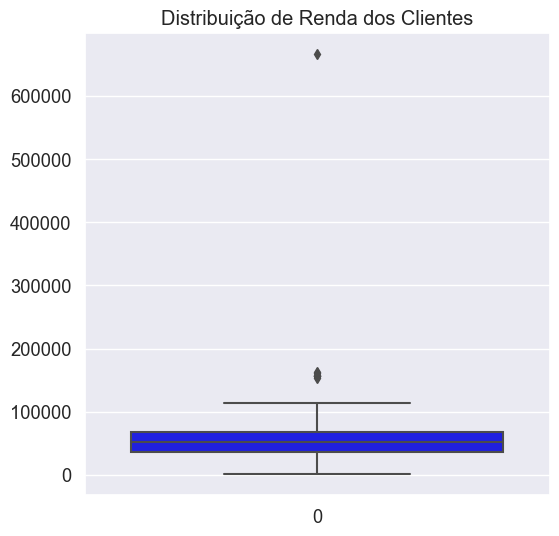

In [10]:
plt.figure(figsize = (6, 6))
plt.title("Distribuição de Renda dos Clientes")
sns.boxplot(data = df['Income'], color = 'blue')

Optamos por remover o outlier com renda de 666.666, pois não será relevante sua remoção para nossa análise dada a magnitude do dataset

In [11]:
df = df[df['Income'] != 666666.0]

<Axes: title={'center': 'Distribuição de Renda dos Clientes (sem o outlier)'}>

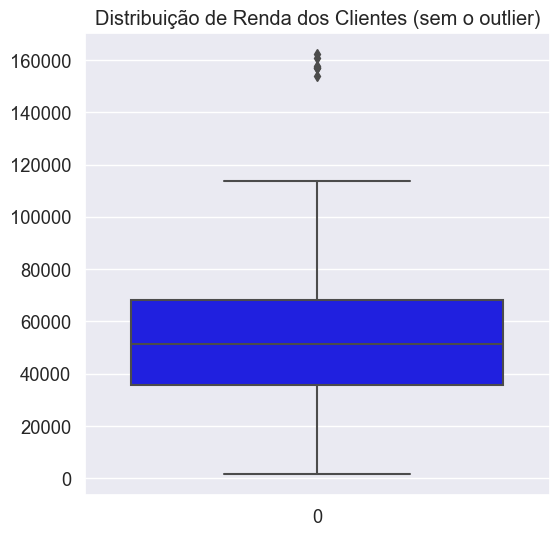

In [12]:
plt.figure(figsize = (6, 6))
plt.title("Distribuição de Renda dos Clientes (sem o outlier)")
sns.boxplot(data = df['Income'], color = 'blue')

## Feature Engeniring

Agora que não temos mais valores ausentes, vamos criar uma nova feature que será a idade dos clientes com base nas colunas  Dt_Customer e Year_Birth

In [13]:
df['Customer_Age_When_Enrolled'] = df['Dt_Customer'].dt.year - df['Year_Birth']

Também a feature de Total Gasto, já que temos a divisão entre MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts e MntGoldProds

In [14]:
df['Total_Spent'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

O Total de Compras que é o número de compras que os clientes fizeram

In [15]:
df['Total_Purchases'] = df[['NumDealsPurchases','NumWebPurchases','NumStorePurchases','NumCatalogPurchases']].sum(axis=1)

E a vamos também juntar as features Kidhome (se os clientes tem crianças em casa) e Teenhome (se os clientes tem adolescentes) em casa

In [16]:
df['Kids_Teen_at_home'] = df[['Kidhome','Teenhome']].sum(axis=1)

Vamos remover as variáveis que não vamos mais utilizar

In [17]:
df = df.drop(['Kidhome', 'Teenhome'], axis = 1)

**Vamos voltar a identificar a presença de outliers utlizando uma régua de 2IQR para as features que vamos utlizar em nossa análise**

In [18]:
# Colunas de interesse
colunas = ['Customer_Age_When_Enrolled', 'Total_Spent', 'Total_Purchases', 'Kids_Teen_at_home']
# FUncao para detectar outliers
def detectar_outliers_iqr(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 2 * IQR
    limite_superior = Q3 + 2 * IQR
    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'limite_inferior': limite_inferior,
        'limite_superior': limite_superior,
        'outliers': col[(col < limite_inferior) | (col > limite_superior)]
    }

In [19]:
for coluna in colunas:
    res = detectar_outliers_iqr(df[coluna])
    print(f'{coluna}: {res["outliers"].count()} outliers ({100*res["outliers"].count()/df.shape[0]:.2f}%)')

Customer_Age_When_Enrolled: 3 outliers (0.13%)
Total_Spent: 0 outliers (0.00%)
Total_Purchases: 0 outliers (0.00%)
Kids_Teen_at_home: 0 outliers (0.00%)


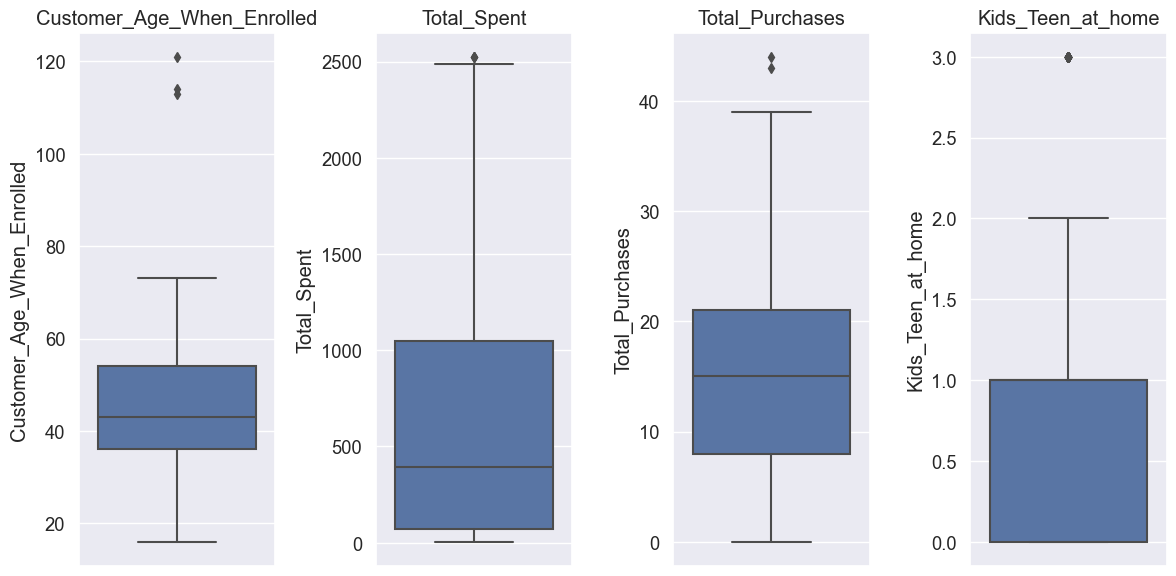

In [20]:
plt.figure(figsize=(12,6))
for i, coluna in enumerate(colunas):
    plt.subplot(1, len(colunas), i+1)
    sns.boxplot(y=df[coluna])
    plt.title(coluna)
plt.tight_layout()
plt.show()

In [21]:
for coluna in colunas:
    res = detectar_outliers_iqr(df[coluna])
    outliers = res['outliers']
    if not outliers.empty:
        print(f"\nColuna: '{coluna}'")
        print(outliers)


Coluna: 'Customer_Age_When_Enrolled'
513     121
827     114
2233    113
Name: Customer_Age_When_Enrolled, dtype: int64


Possuimos apenas 03 outliers na variável de idade e vamos remove-los pois muito provavelmente gerará ruído nos dados e são apenas três valores, que correspondem a 0.13% dos dados

In [22]:
df = df[df['Customer_Age_When_Enrolled'] != 113]
df = df[df['Customer_Age_When_Enrolled'] != 114]
df = df[df['Customer_Age_When_Enrolled'] != 121]

**Verificação de valores duplicados**

In [23]:
df.duplicated().sum()

0

**Verificando dataset após a limpeza e criação de novas features**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          2236 non-null   int64         
 1   Year_Birth                  2236 non-null   int64         
 2   Education                   2236 non-null   object        
 3   Marital_Status              2236 non-null   object        
 4   Income                      2236 non-null   float64       
 5   Dt_Customer                 2236 non-null   datetime64[ns]
 6   Recency                     2236 non-null   int64         
 7   MntWines                    2236 non-null   int64         
 8   MntFruits                   2236 non-null   int64         
 9   MntMeatProducts             2236 non-null   int64         
 10  MntFishProducts             2236 non-null   int64         
 11  MntSweetProducts            2236 non-null   int64         
 1

# Análises e Visualizações

Analisando a idade dos clientes

<Axes: title={'center': 'Distribuição da Idade dos Clientes'}>

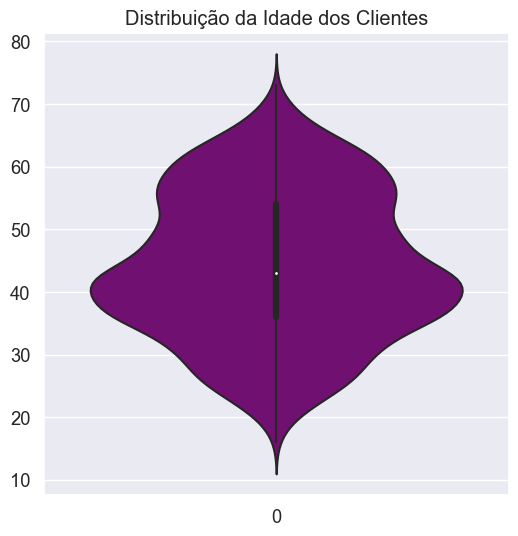

In [25]:
plt.figure(figsize = (6, 6))
plt.title("Distribuição da Idade dos Clientes")
sns.violinplot(data = df['Customer_Age_When_Enrolled'], color = 'purple')

Aqui é possivel observar que a maioria dos clientes estão por volta dos 35 a 45 anos, sendo um dado interessante a se observar.

Como estão distibuidos em relação a escolaridade

<Axes: title={'center': 'Distribuição da Clientes por Nivél de Escolaridade'}, xlabel='Education', ylabel='count'>

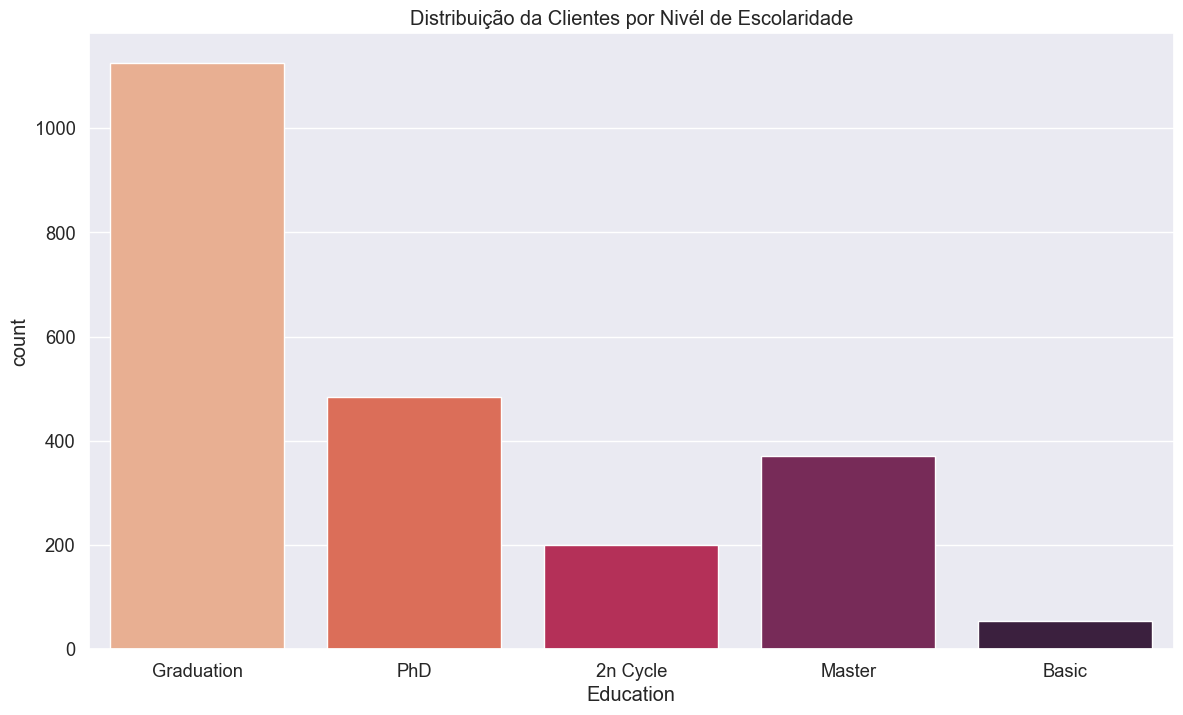

In [26]:
education_counts = df['Education'].value_counts()
plt.figure(figsize = (14, 8))
plt.title("Distribuição da Clientes por Nivél de Escolaridade")
sns.countplot(x = df['Education'], palette = 'rocket_r')


Observa-se a vísivel predominancia de clientes que se econtram na graduação, seguido por PhD e Mestres e a minoria no nivél básico

Para anlisar o estado Civil dos clientes vamos colocar em um df para 

E em relação a estado civil

In [27]:
# Criando um df para armazernar a contagem de cada tipo de estado civil
estado_civil = df['Marital_Status'].value_counts().to_frame('Count')

In [28]:
estado_civil

,Count
Marital_Status,
Married,864
Together,578
Single,479
Divorced,231
Widow,77
Alone,3
YOLO,2
Absurd,2


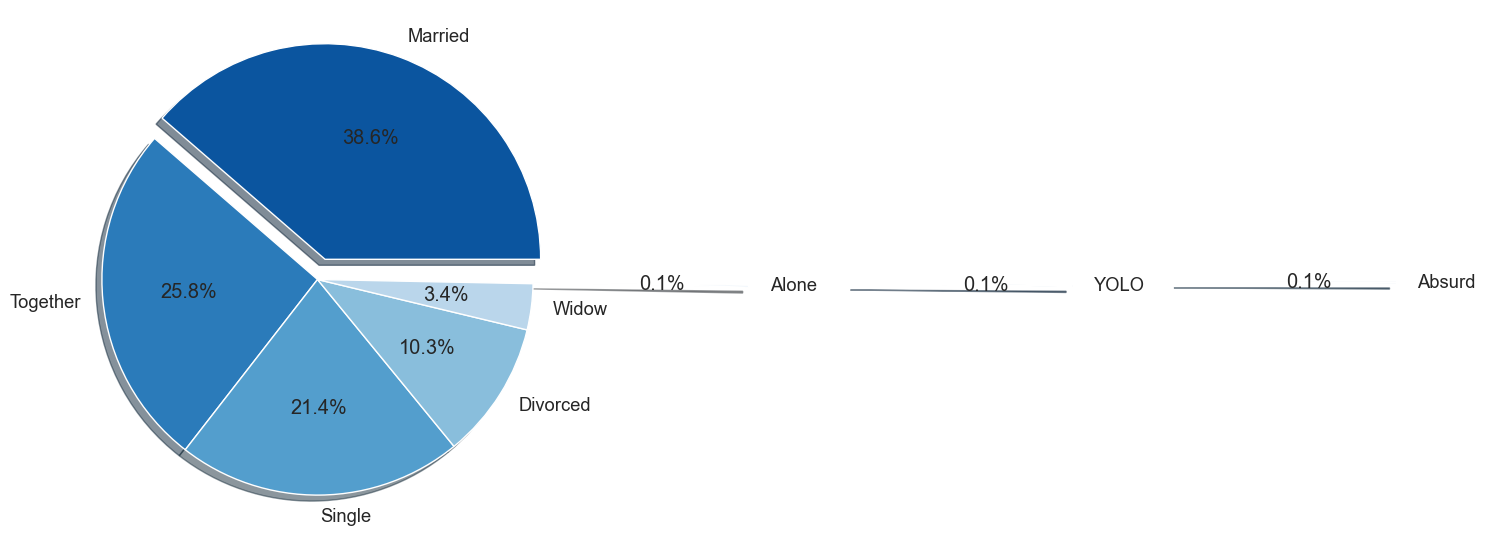

In [29]:
sns.set_palette('Blues_r')
plt.figure(figsize = (7, 7))
plt.pie(estado_civil['Count'], 
        labels = estado_civil.index, 
        explode = (0.1, 0, 0, 0, 0, 1, 2.5, 4), 
        shadow = True, 
        autopct = '%1.1f%%')
plt.show()

É possivel observar que a maior parte dos clientes são casados, seguido por clientes que estão juntos e solteiros, isso revela um dado importante do perfil do cliente

Analisando a distribuição de renda dos clientes

Text(0, 0.5, 'Densidade')

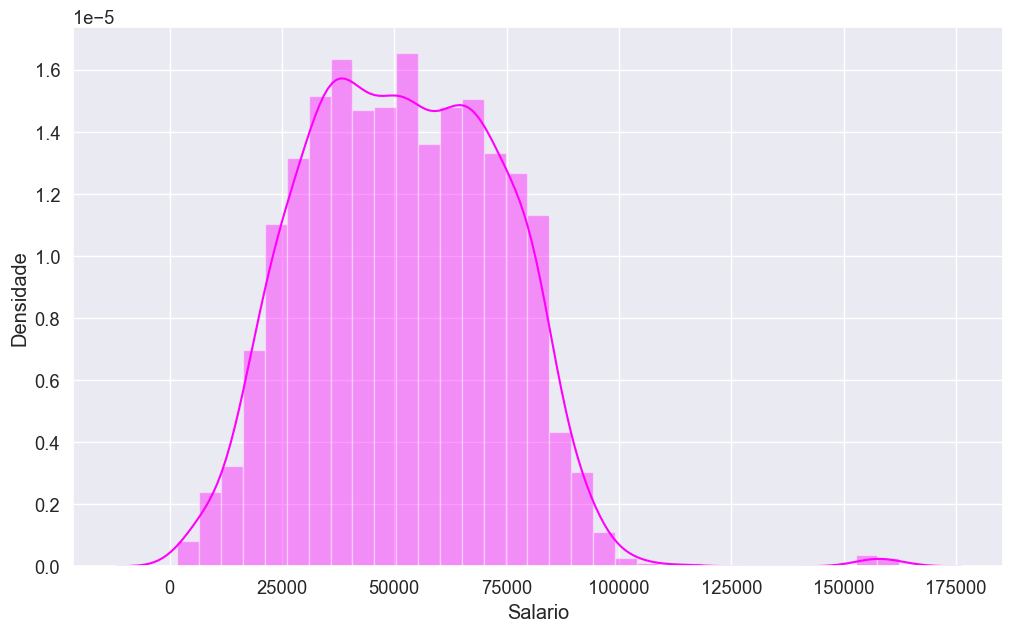

In [30]:
df = df[df['Income'] < 200000]
plt.figure(figsize = (12,7))
sns.distplot(df['Income'], color = 'magenta')
plt.xlabel('Salario')
plt.ylabel('Densidade')

É possivel notar a grande maioria dos clientes com renda em torno de 50.000, aproximando-se de uma distribuição normal da variavel renda, ainda é possivél dois clientes que possuem uma renda muito acima (150.000)

Relação da variável Renda com a variável Educação

Text(0, 0.5, 'Salario')

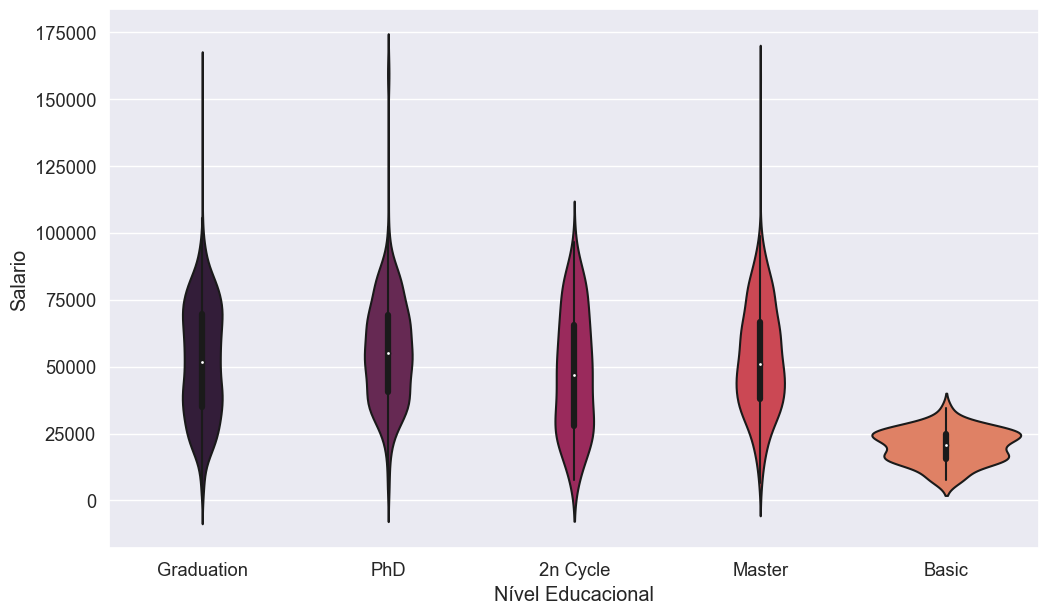

In [31]:
sns.set_palette('rocket')
plt.figure(figsize = (12, 7))
sns.violinplot(y = df['Income'], x = df['Education'])
plt.xlabel('Nível Educacional')
plt.ylabel('Salario')

É possivel validar, com base no perfil dos clientes a clara tendência de maior o nivel de escolaridade maior o salário

Relação da variável Renda com a variável Gastos com Produtos de Ouro

Text(0, 0.5, 'Gasto com Produtos de Ouro')

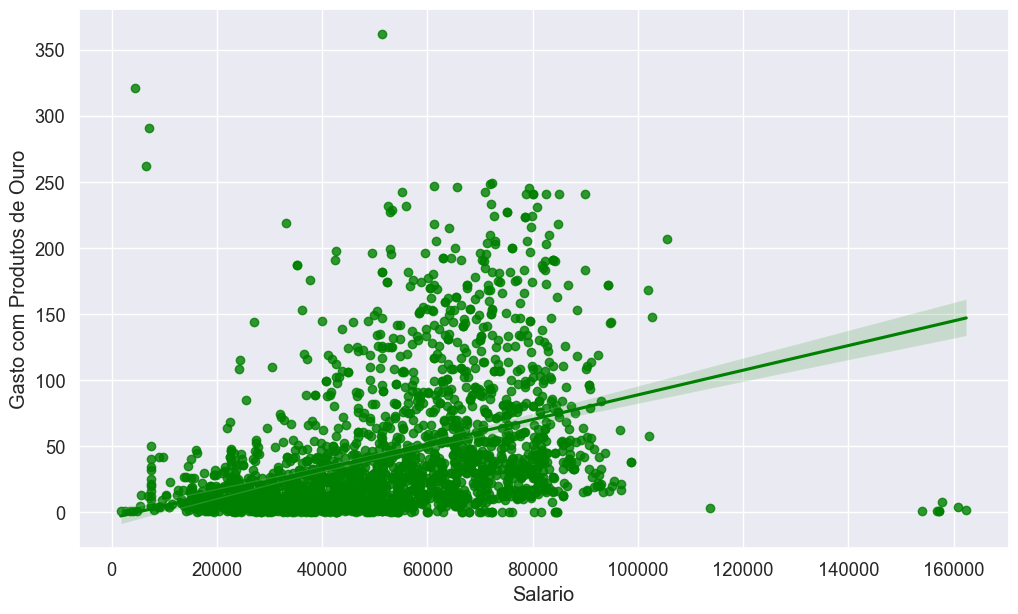

In [32]:
plt.figure(figsize = (12, 7))
sns.regplot(x = df['Income'], y = df['MntGoldProds'], color = 'green')
plt.xlabel('Salario')
plt.ylabel('Gasto com Produtos de Ouro')

É posivel observar a tendência de maior a renda maior o gastos com ouro

Relação da variável Renda com a variável Gasto Total em Compras

Text(0, 0.5, 'Gasto Total em Compras')

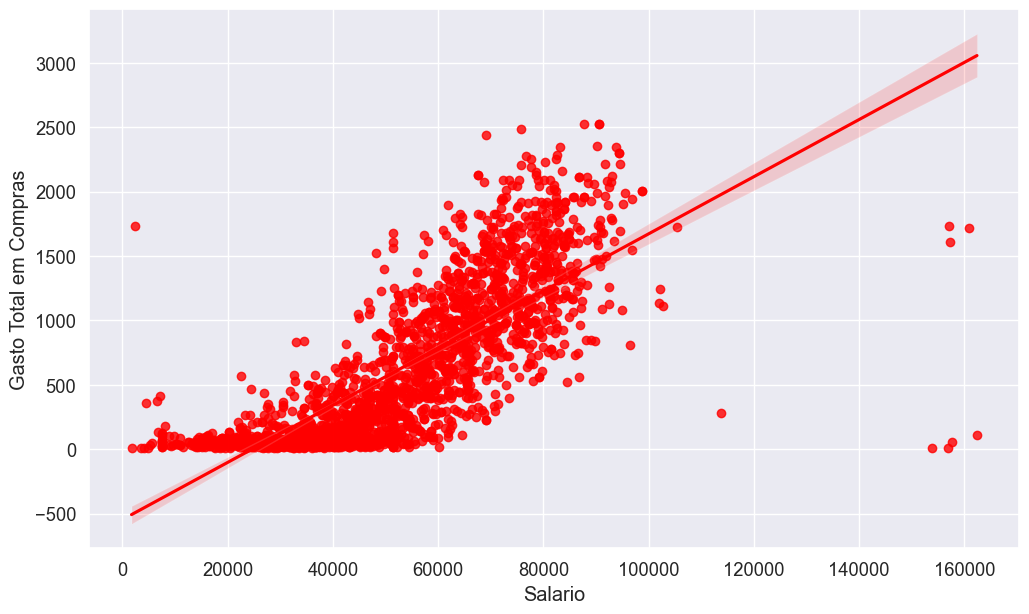

In [33]:
# Dataviz 21
plt.figure(figsize = (12, 7))
sns.regplot(x = df['Income'], y = df['Total_Spent'], color = 'red')
plt.xlabel('Salario')
plt.ylabel('Gasto Total em Compras')

Nota-se também a relação positiva com o salario e o gasto total em compras do cliente

Distribuição da idade dos clientes na data de cadastro:

Text(0, 0.5, 'Densidade')

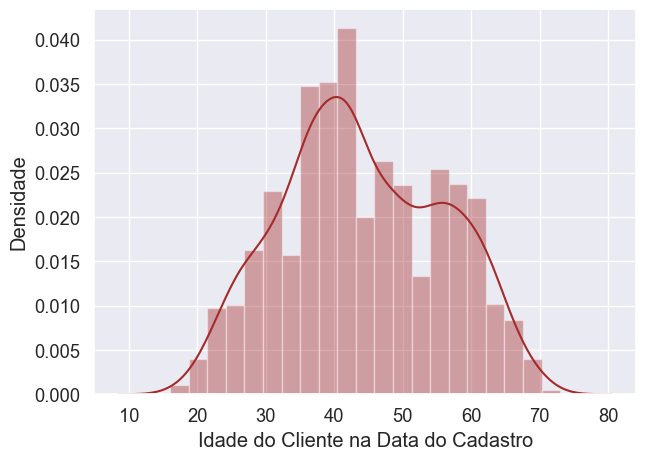

In [34]:
plt.figure(figsize = (7, 5))
sns.distplot(df['Customer_Age_When_Enrolled'], color = 'brown')
plt.xlabel('Idade do Cliente na Data do Cadastro')
plt.ylabel('Densidade')

A maioria dos clientes se encontram na faixa de 40 anos, indicando um nicho importante e mais presente para esse shopping center.

Distribuição dos clientes em relação ao país de origem

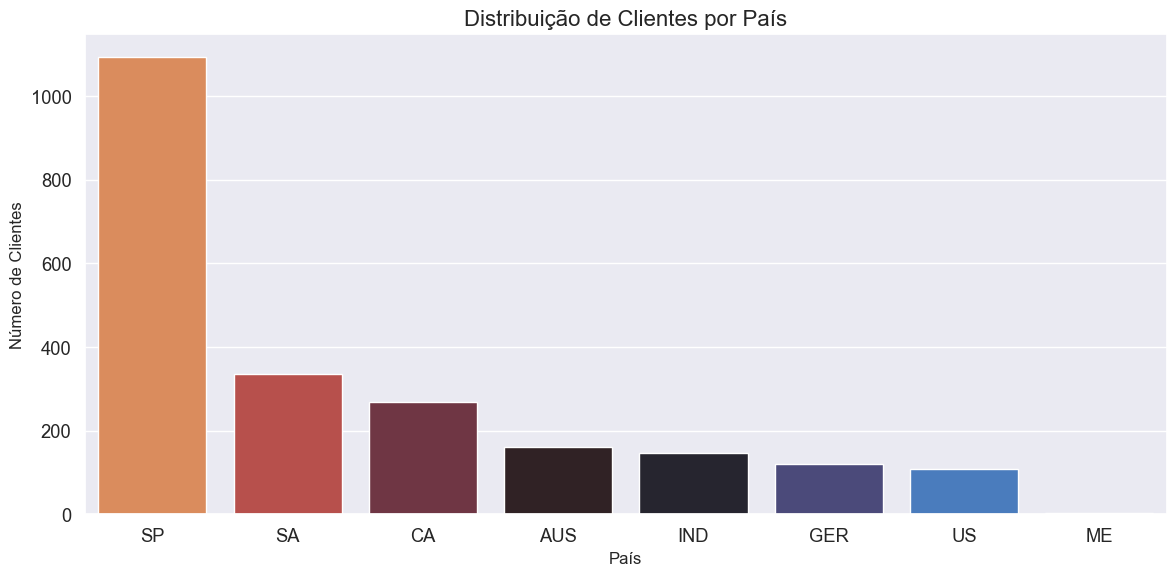

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x='Country',
    data=df,
    palette='icefire_r',
    order=df['Country'].value_counts().index
)
plt.title('Distribuição de Clientes por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.tight_layout()
plt.show()

A maioria dos clientes são do país de origem do dataset (Singapura), seguidos por cientes da Arábia Saudita e Canada 

Relação entre o país de origem e o total de compras

<Axes: title={'center': 'Distribuição de Compras por País'}, xlabel='Country', ylabel='Total_Purchases'>

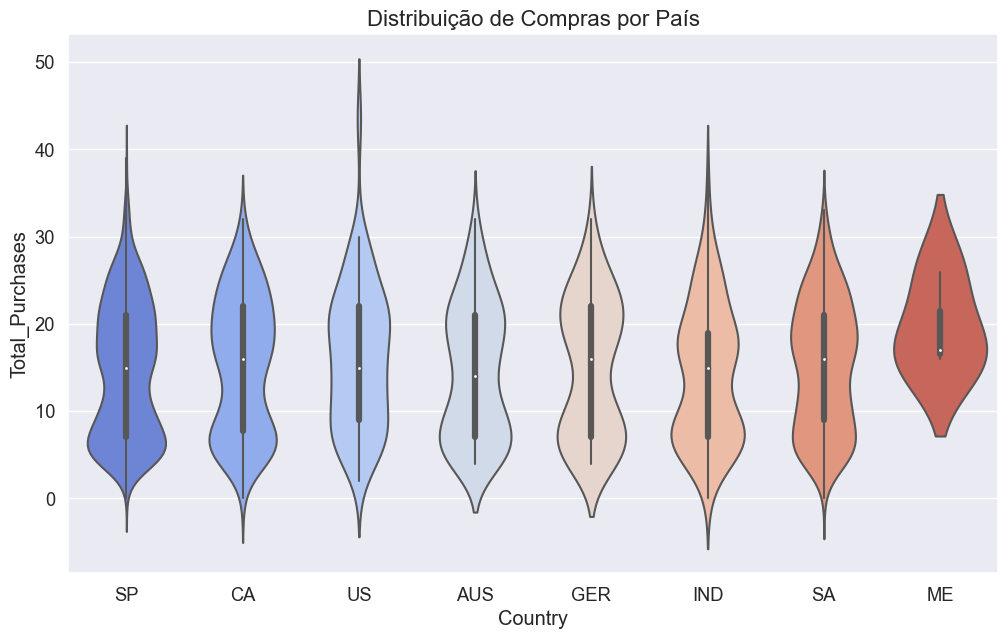

In [36]:
plt.figure(figsize = (12, 7))
plt.title('Distribuição de Compras por País', fontsize=16)
sns.violinplot(x = df['Country'], y = df['Total_Purchases'], palette = 'coolwarm')

Observamos que os páises seguem um comportamento paracido em relação ao valor total em compras por cliente, com exceção dos Estados Unidos que apresenta alguns clientes que compram valores maiores e o Mexico que apresenta um comportamento bem diferente dos demais

Agrupamento da Variável Total de Compras por País

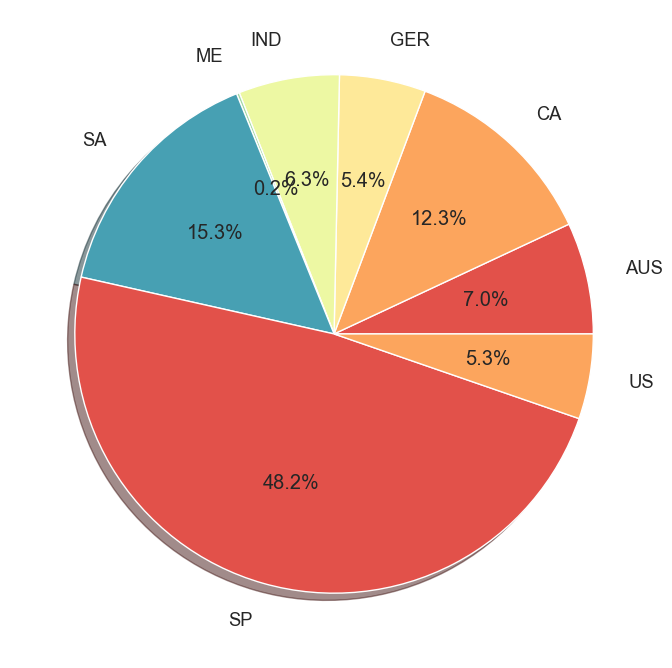

In [37]:
pm = df[['Total_Purchases', 'Country']].groupby(['Country']).agg([sum])
sns.set_palette('Spectral')
plt.figure(figsize = (7, 7))
plt.pie(
    pm['Total_Purchases']['sum'],
    labels=pm.index,
    shadow=True,
    autopct='%1.1f%%',
    labeldistance=1.15    # Aumenta a distância dos rótulos
)
plt.tight_layout()
plt.show()

Podemos ver que a grande maioria de fato esta em Singapura, seguida pela Arábia Saudita, onde temos quase 55% do total em compras

Data de cadastro do cliente ao longo dos meses 

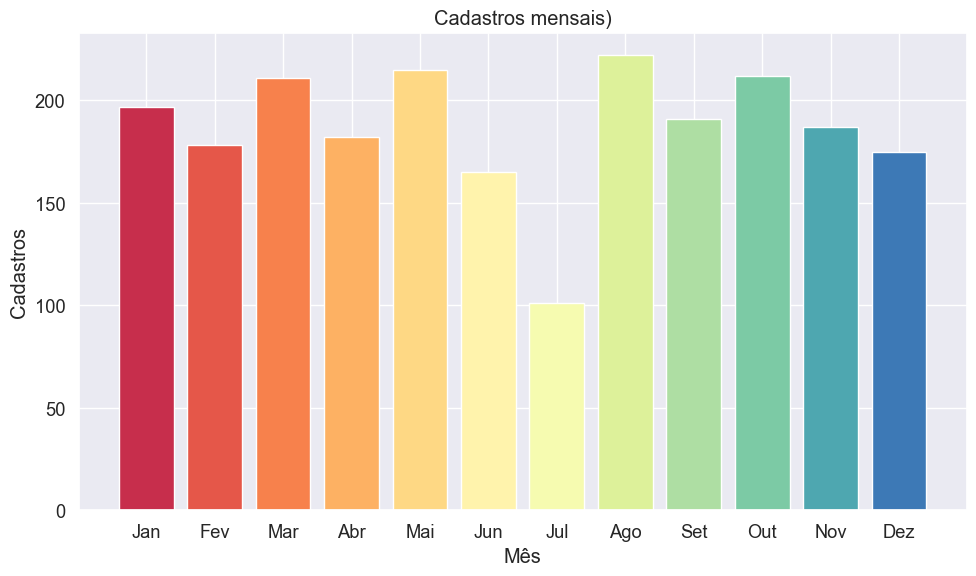

In [38]:
cadastros_mes = df['Dt_Customer'].dt.month.value_counts().sort_index()
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
cores = sns.color_palette("Spectral", len(meses))
plt.figure(figsize=(10,6))
plt.bar(meses, cadastros_mes, color=cores)
plt.xlabel('Mês')
plt.ylabel('Cadastros')
plt.title('Cadastros mensais)')
plt.tight_layout()
plt.show()

É possivel observar que o cadastro de clientes é bem distribuido ao longo do ano para os anos analisados, com destauqe para julho e junho que possuem uma leve baixa.